# Preparação do ambiente

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from os import path as osp
from tqdm.auto import tqdm

from functions import clean_text, plot_docs_matrix, plot_wordcloud

## Constantes e funções auxiliares

# Carga e prepação dos dados

In [33]:
file_amazon_clean_targets = '../datasets/amazon_clean_targets.partet'
if osp.exists(file_amazon_clean_targets):
    df_amazon = pd.read_parquet(file_amazon_clean_targets)
else:
    df_amazon = pd.read_parquet('../datasets/amazon.parquet.gzip')
    df_amazon = df_amazon[~df_amazon['cat_0'].isna()]
    df_amazon = df_amazon.fillna('#NULO#')
    df_amazon = df_amazon.reset_index(drop=True)
    
    columns_to_keep = ['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5']
    df_amazon['cat_full'] = df_amazon[columns_to_keep].apply(lambda row: '|'.join(row),axis=1)
    
    df_amazon['nome'] = df_amazon['Nome'].map(clean_text)
    df_amazon['descricao'] = df_amazon['Descrição_Principal'].map(clean_text)
    
    columns_to_keep = ['Link', 'nome', 'descricao', 'cat_full']
    df_amazon = df_amazon[columns_to_keep]
    
    df_cat = pd.read_csv('../datasets/map_cat_full.csv',sep=';')
    df_amazon = df_amazon.merge(df_cat)

    df_amazon.to_parquet(file_amazon_clean_targets)

df_amazon

Link  \
0      https://www.amazon.com.br/Especiais-Cinematic-...   
1      https://www.amazon.com.br/UKCOCO-Filtro-lente-...   
2      https://www.amazon.com.br/REYGEAK-Conjunto-ace...   
3      https://www.amazon.com.br/REYGEAK-ND-Mini-pola...   
4      https://www.amazon.com.br/REYGEAK-filtros-vari...   
...                                                  ...   
51371  https://www.amazon.com.br/Albums-Produced-Jame...   
51372  https://www.amazon.com.br/Nike-Swim-Sting-Jamm...   
51373  https://www.amazon.com.br/Laurence-Crane-Drone...   
51374  https://www.amazon.com.br/Gatorade-Powder-Flav...   
51375  https://www.amazon.com.br/Livros-Treinando-Ort...   

                                                    nome  \
0      filtro lente efeitos especiais blue streak cam...   
1      ukcoco filtro cpl lente celular 37 mm lente un...   
2      reygeak conjunto filtros nd cpl dji mini 4 pro...   
3      reygeak conjunto filtros nd cpl dji mini 4 pro...   
4      reygeak kit filtros lente nd variavel osmo poc...   
...                                                  ...   
51371  albums produced james iha aeroplane flies high...   
51372       nike swim masculino fade sting jammers preto   
51373                              drones scales objects   
51374  gatorade zero powder 3 flavor variety pack 50 ...   
51375  kit 4 livros treinando ortografia nivel 1 2 3 ...   

                                               descricao  \
0      modelo aplicavel filtro listras azuis adequado...   
1      reflexoes eliminacao polarizadores cpl sao usa...   
2      reygeak conjunto filtros nd feito especificame...   
3      projetado especificamente mini 4 pro clipes pl...   
4      reygeak filtro variavel nd 2-32 nd 64-512 ofer...   
...                                                  ...   
51371                                                      
51372  92 poliester 8 elastano costuras planas reduzi...   
51373                                                      
51374                                                      
51375                                                      

                                                cat_full  target  
0      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...  Outros  
1      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...  Outros  
2      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...  Outros  
3      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...  Outros  
4      Eletrônicos e Tecnologia|Câmeras e Foto|Acessó...  Outros  
...                                                  ...     ...  
51371  Livros|Inglês e Outras Línguas|Arte, Cinema e ...  Outros  
51372  Moda|Masculino|Acessórios|Chapéus, Toucas e Bo...  Outros  
51373  CD e Vinil|Clássica|Música de Câmara|#NULO#|#N...  Outros  
51374  Alimentos e Bebidas|Café, Chá e outras Bebidas...  Outros  
51375  Livros|Educação, Referência e Didáticos|#NULO#...  Outros  

[51376 rows x 5 columns]

In [27]:
df_targets = df_amazon[['target','Link']].groupby('target',as_index=False).count().sort_values(by='Link',ascending=False)
df_targets

target   Link
5                           Outros  29454
2          Celulares e Smartphones   6586
7                    Transceptores   5144
1                     Carregadores   3836
4  Dispositivos de Conexão em Rede   2613
0                            Cabos   2056
6   Teclados, Mouses e Periféricos   1080
3                           Câmera    607

## Palavras mais frequentes no dataset inteiro

### Campo nome

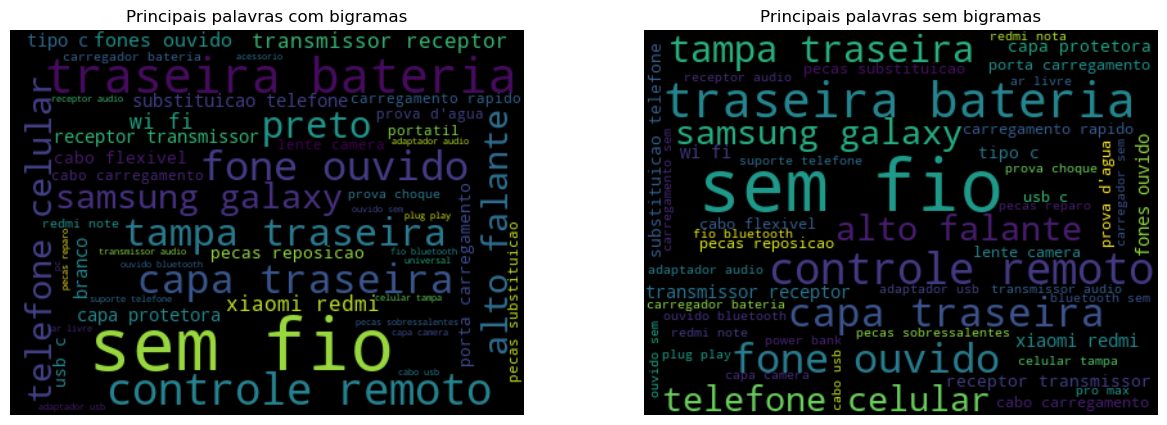

In [4]:
docs = ' '.join(df_amazon['nome'].to_list())
plot_wordcloud(docs)

### Campo descrição 

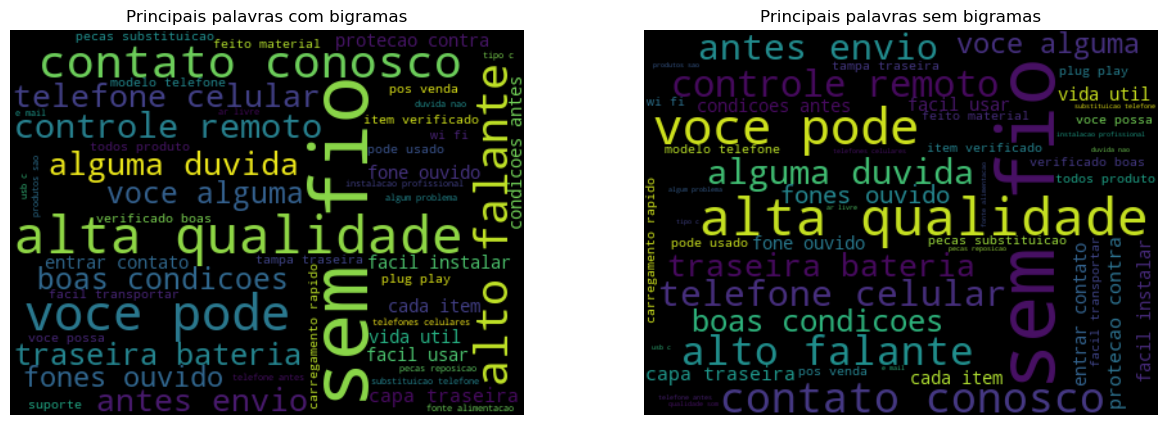

In [35]:
docs = ' '.join(df_amazon['descricao'].to_list())
plot_wordcloud(docs)

## Palavras mais frequentes no dataset segmentado por classe

### Campo nome

Categoria: Outros
Quantidade de items na categoria: 29454


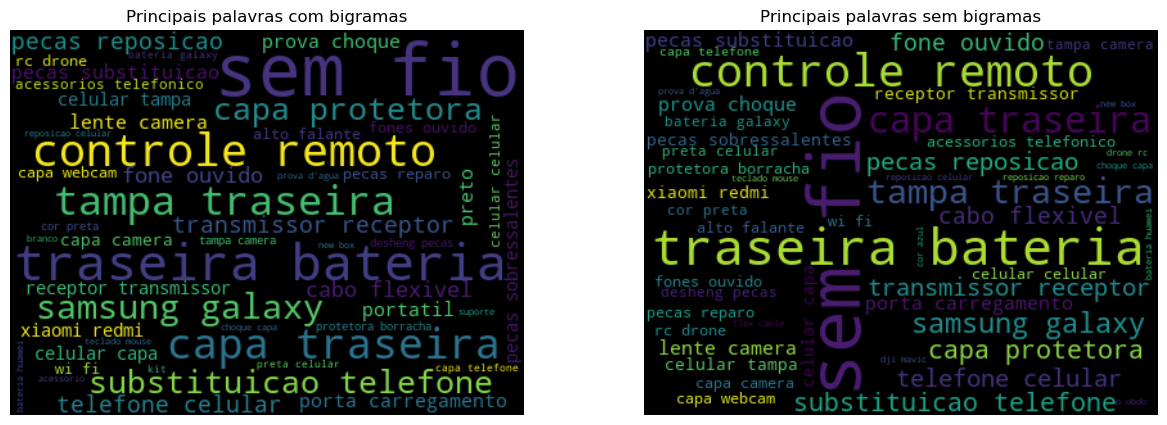

Categoria: Celulares e Smartphones
Quantidade de items na categoria: 6586


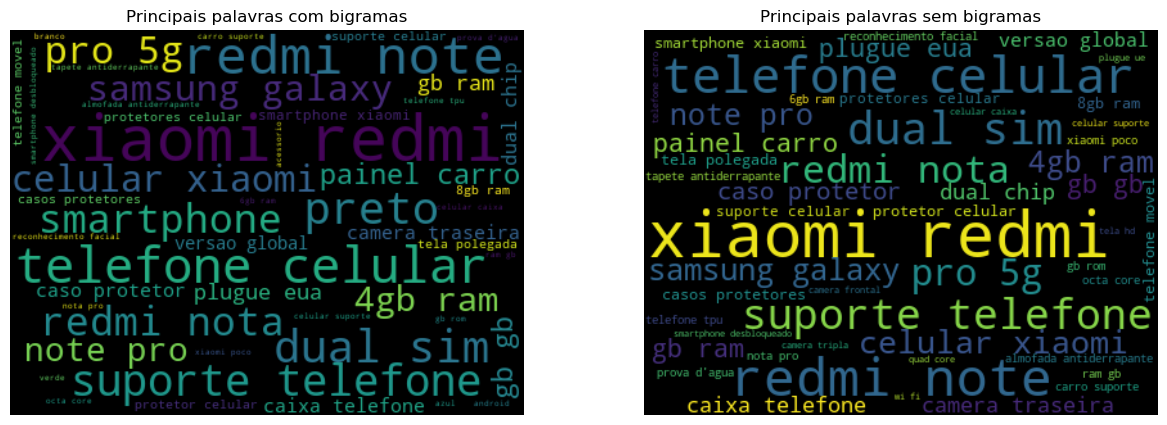

Categoria: Transceptores
Quantidade de items na categoria: 5144


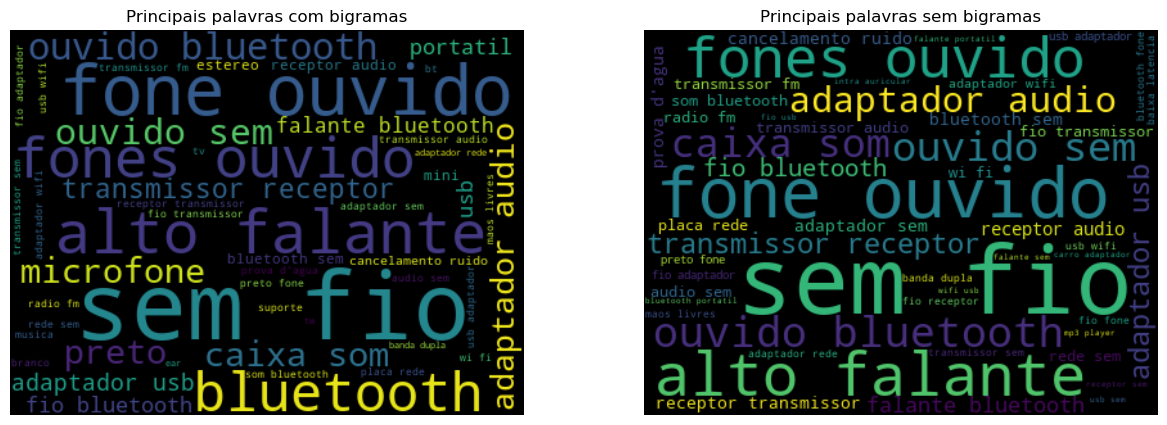

Categoria: Carregadores
Quantidade de items na categoria: 3836


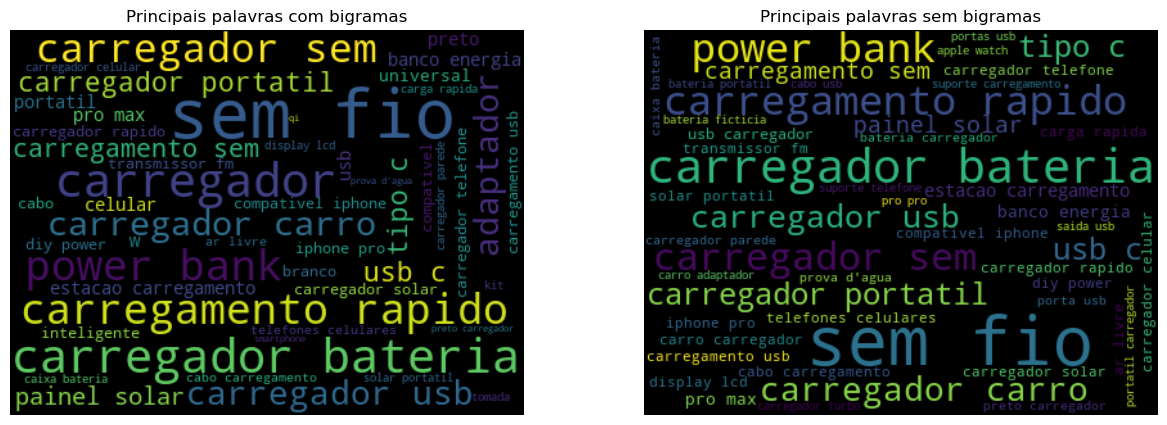

Categoria: Dispositivos de Conexão em Rede
Quantidade de items na categoria: 2613


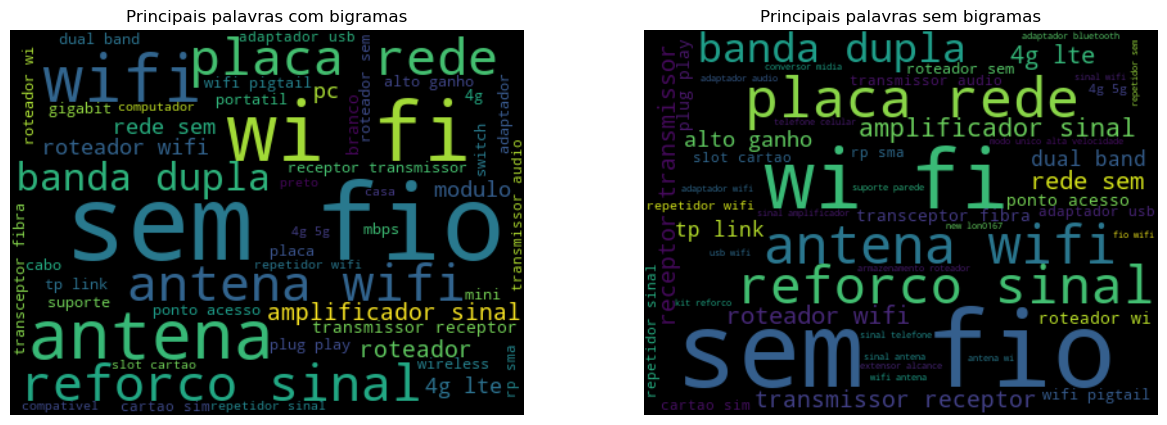

Categoria: Cabos
Quantidade de items na categoria: 2056


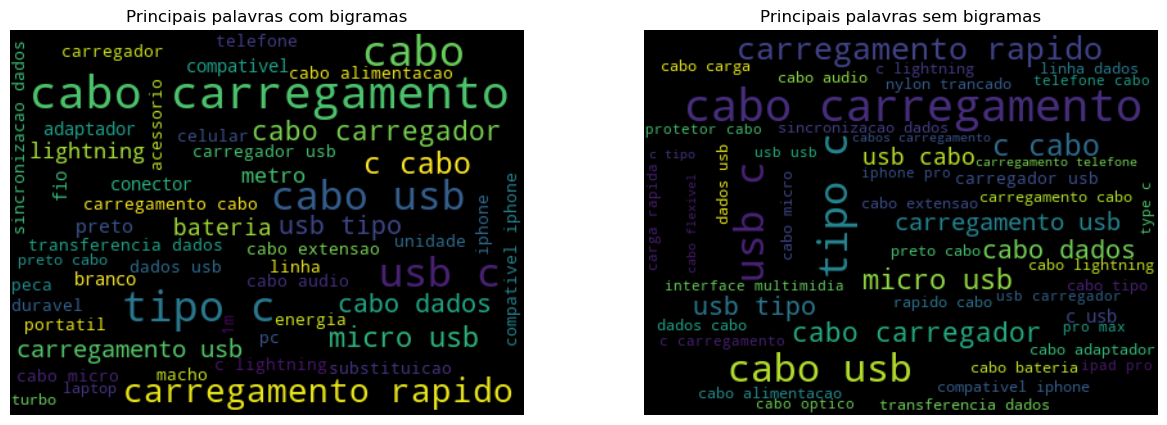

Categoria: Teclados, Mouses e Periféricos
Quantidade de items na categoria: 1080


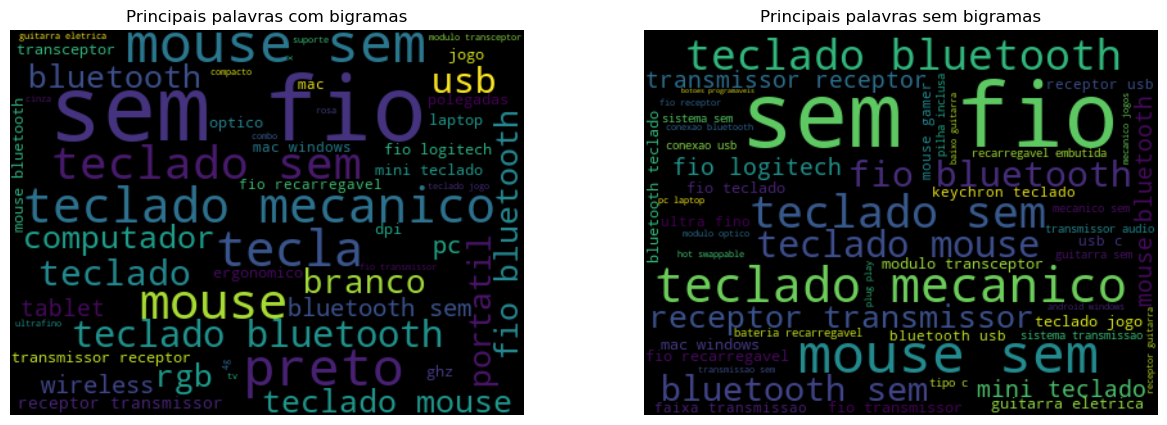

Categoria: Câmera
Quantidade de items na categoria: 607


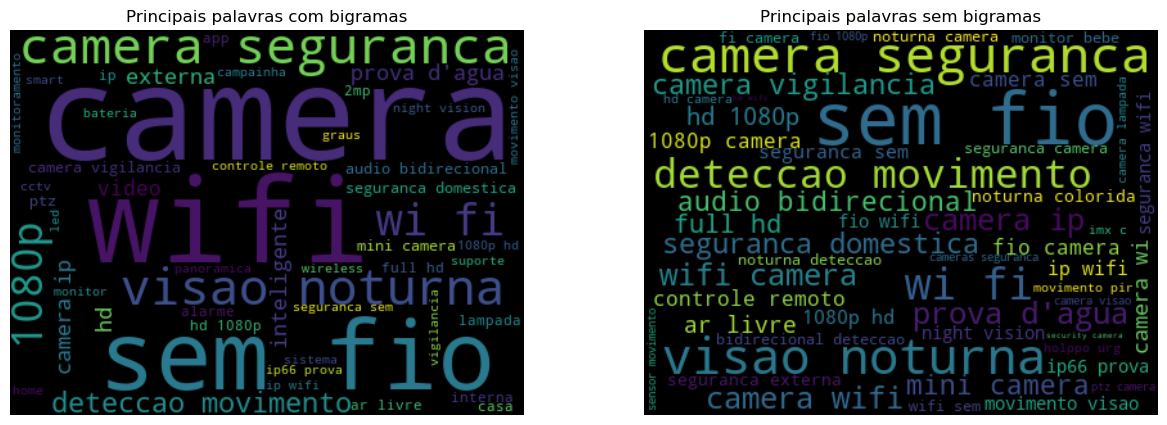

In [31]:
for target in df_targets['target'].unique():
    docs = ' '.join(df_amazon[df_amazon['target']==target]['nome'].to_list())
    items_count = df_targets[df_targets['target']==target]['Link'].values[0]
    print(f'Categoria: {target}\nQuantidade de items na categoria: {items_count}')
    plot_wordcloud(docs)

### Campo descrição

Categoria: Outros
Quantidade de items na categoria: 29454


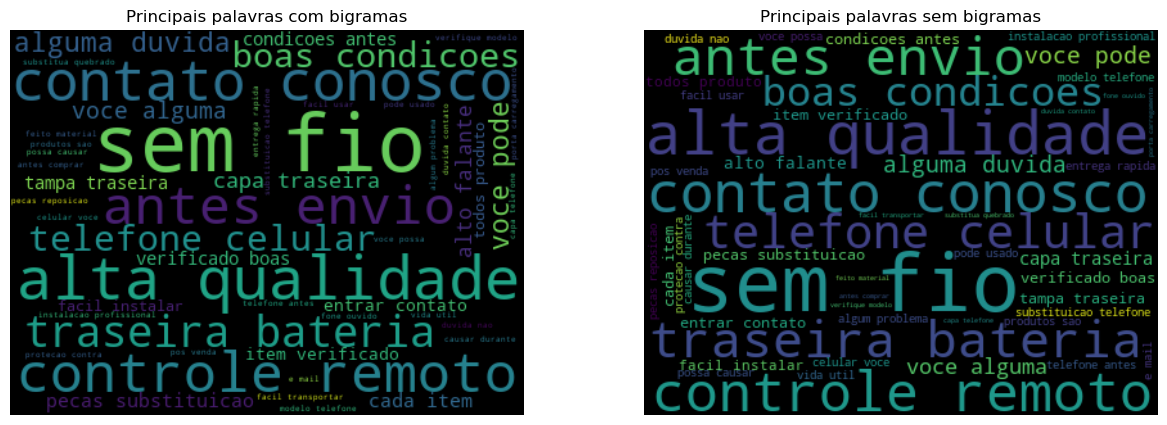

Categoria: Celulares e Smartphones
Quantidade de items na categoria: 6586


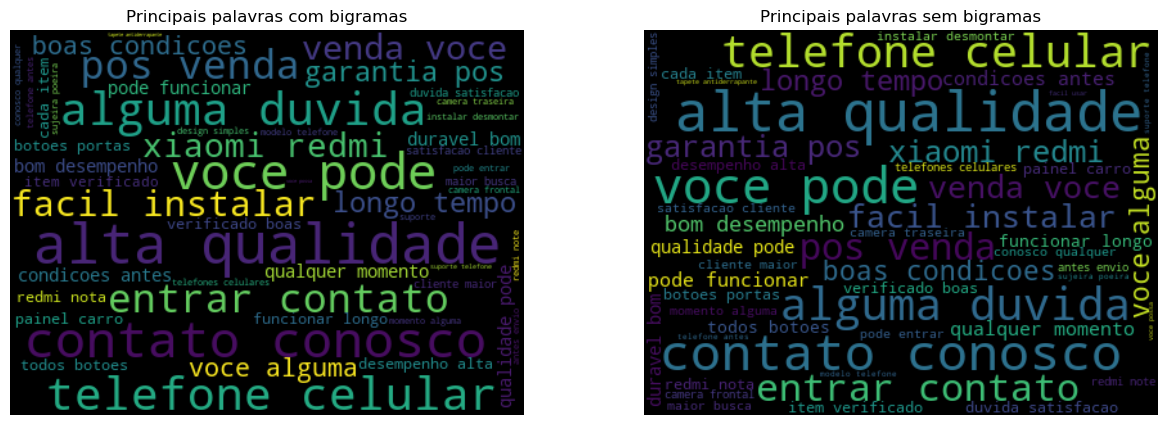

Categoria: Transceptores
Quantidade de items na categoria: 5144


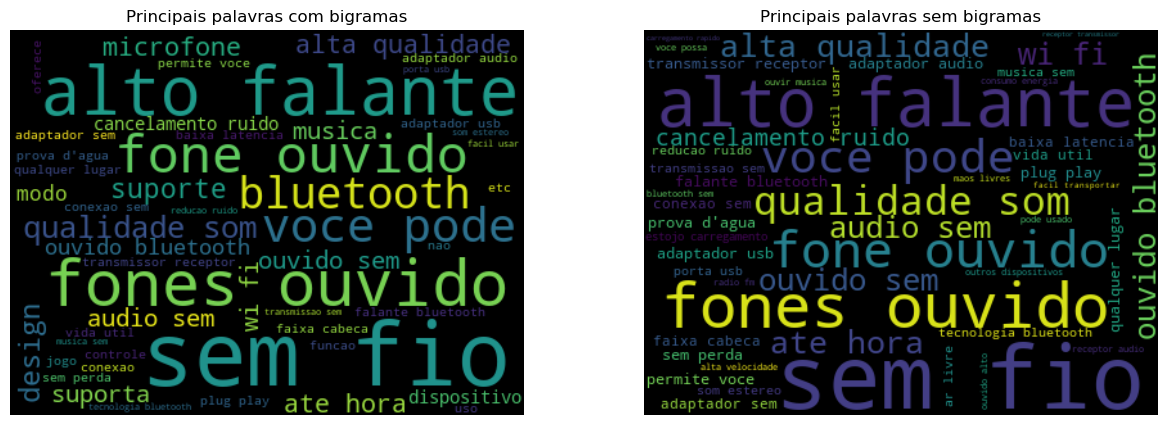

Categoria: Carregadores
Quantidade de items na categoria: 3836


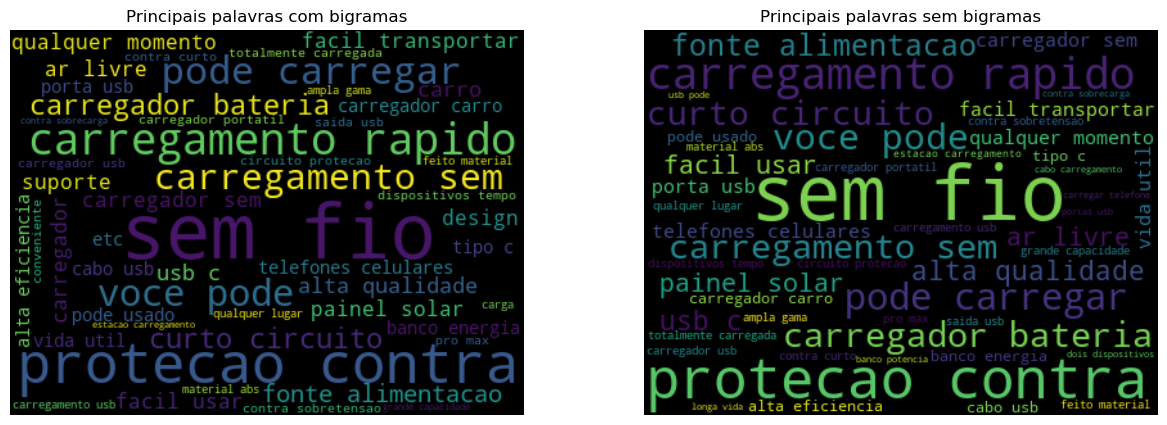

Categoria: Dispositivos de Conexão em Rede
Quantidade de items na categoria: 2613


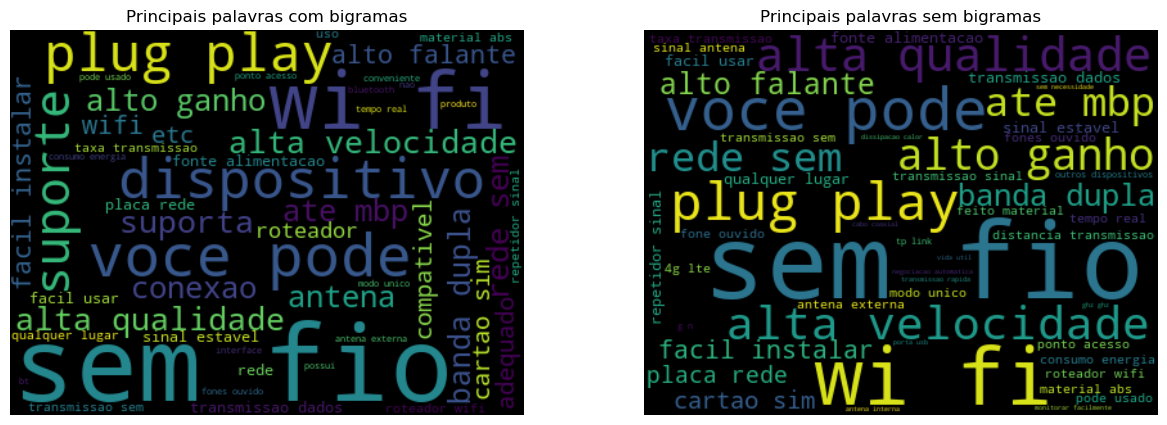

Categoria: Cabos
Quantidade de items na categoria: 2056


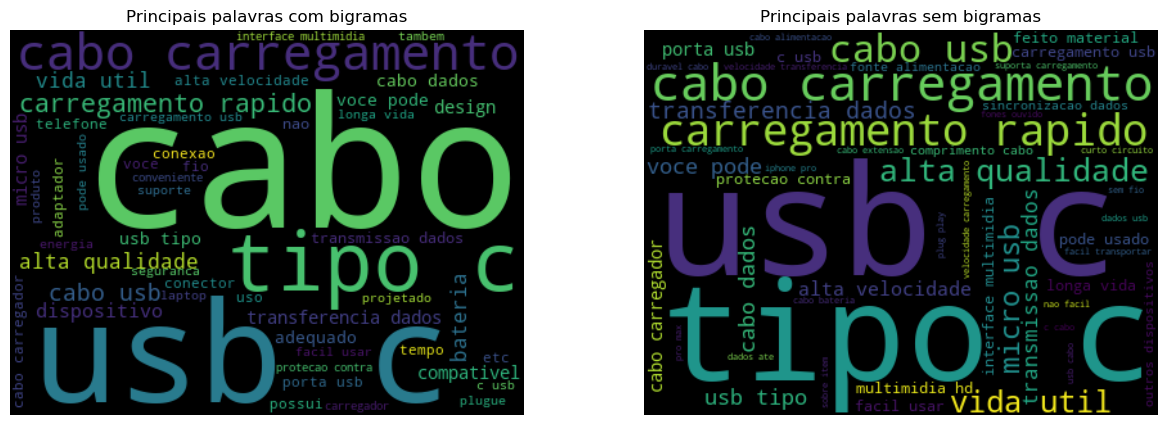

Categoria: Teclados, Mouses e Periféricos
Quantidade de items na categoria: 1080


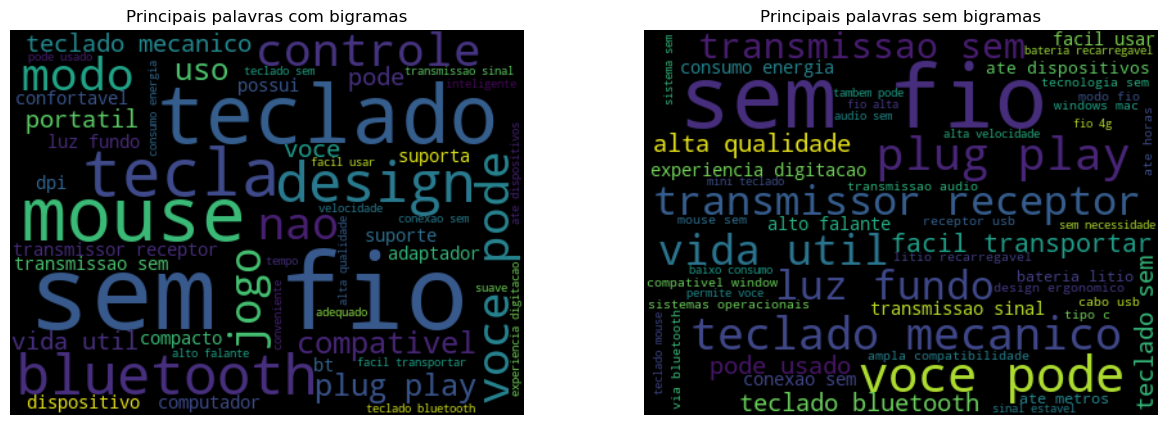

Categoria: Câmera
Quantidade de items na categoria: 607


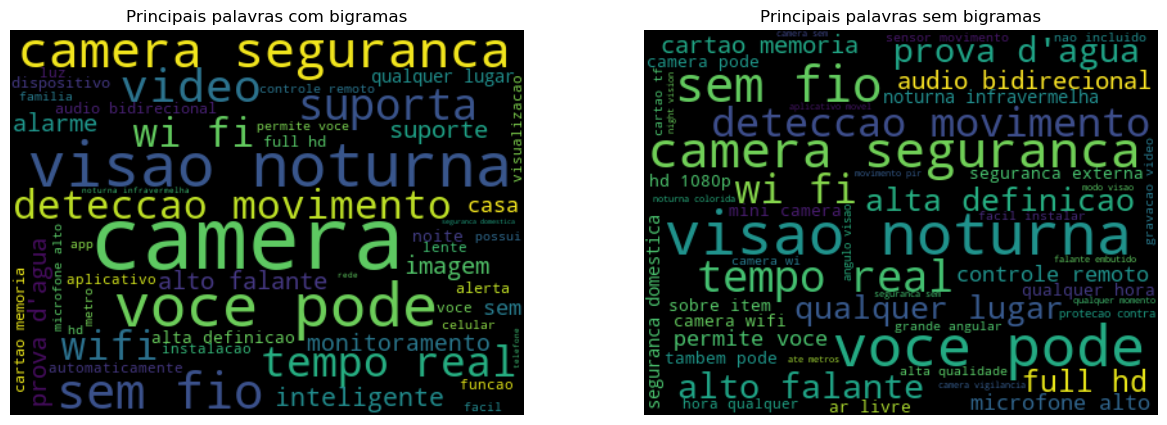

In [34]:
for target in df_targets['target'].unique():
    docs = ' '.join(df_amazon[df_amazon['target']==target]['descricao'].to_list())
    items_count = df_targets[df_targets['target']==target]['Link'].values[0]
    print(f'Categoria: {target}\nQuantidade de items na categoria: {items_count}')
    plot_wordcloud(docs)

# Análise